# Analysis of the HGCAL position scan from the DESY TB (March 2018)

### Imports
ROOT, etc

In [1]:
import ROOT as rt

Welcome to JupyROOT 6.12/06


### Tree (TChain) definition

In [2]:
tree = rt.TChain("rechitntupler/hits", "Hits"); 
tracks = rt.TChain("trackimpactntupler/impactPoints", "Tracks");
nhits = rt.TChain("tree", "nhits");

tree.AddFriend(tracks, "tracks");
tree.AddFriend(nhits, "nhits");

Add files based on file pattern

In [3]:
### V2 ntuples
#pattern = "scan3/ntuple_1*" ## Scan#3 from 1372 to 1440
#pattern = "scan2/ntuple_1*" ## Scan#2 1464 to 1537
pattern = "calo_scan/ntuple_1*" ## Scan after calo setup 1229 to 1339

tree.Add(pattern);
tracks.Add(pattern);

In [4]:
pattern = "test_v2/" + pattern

nhits.Add(pattern);

Use TProof to speed up processing (caution!)

In [5]:
#rt.TProof.Open('workers=4').SetLogLevel(0)
#tree.SetProof()

In [6]:
%%time
tree.GetEntries()

CPU times: user 387 ms, sys: 100 ms, total: 487 ms
Wall time: 720 ms


596901L

Style setup for tree

In [7]:
tree.SetMarkerStyle(7)

### Variable definition through aliases

In [8]:
## rechit variable shortcuts
tree.SetAlias("rechit_HG","rechit_energyHigh");
tree.SetAlias("rechit_LG","rechit_energyLow");
tree.SetAlias("rechit_id","rechit_channel + 64*rechit_skiroc");
tree.SetAlias("rechit_gainHLG","abs(rechit_energyHigh/rechit_energyLow - 10)");

## Construct global impact position from PI stage position and track impact extraplotation and convert from mm to cm
tree.SetAlias("impactY","-(PI_positionY-140 - impactY_HGCal_layer_1)/10. + 0.34");
tree.SetAlias("impactX","-(PI_positionX-85  - impactX_HGCal_layer_1)/10. + 0.3");

## Deltas
tree.SetAlias("deltaX","rechit_x - impactX");
tree.SetAlias("deltaY","rechit_y - impactY");
tree.SetAlias("deltaR","sqrt(deltaX * deltaX + deltaY * deltaY)");

Basic cuts / preselection

In [9]:
## ensure PI position was stored
basecuts = "PI_positionY > 0 " 
## select events with only 1 track
basecuts += "&& ntracks == 1 " 
## select events with only 1 hit
basecuts += "&& nhits == 1 "
## rechit selection: first layer, energy around MIP, HG/LG consistent with 10
basecuts += "&& rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"
## noisy channels
basecuts += "& !(rechit_skiroc == 0 && rechit_channel == 44)" # 

#basecuts += "&& event < 100 ";

Create eventlist from basecuts and use it

In [10]:
tree.Draw(">> elist",basecuts);
elist = rt.gDirectory.Get('elist')
tree.SetEventList(elist)
tracks.SetEventList(elist)
nhits.SetEventList(elist)

In [11]:
elist.GetN()

80548

Create canvas (required in notebooks)

In [12]:
canv = rt.TCanvas("canv","c",800,600);

## Alignment

#### Plot global raw impact positions (pre alignment)

- the last run was at the home (center) position

CPU times: user 1.64 s, sys: 145 ms, total: 1.78 s
Wall time: 2.08 s


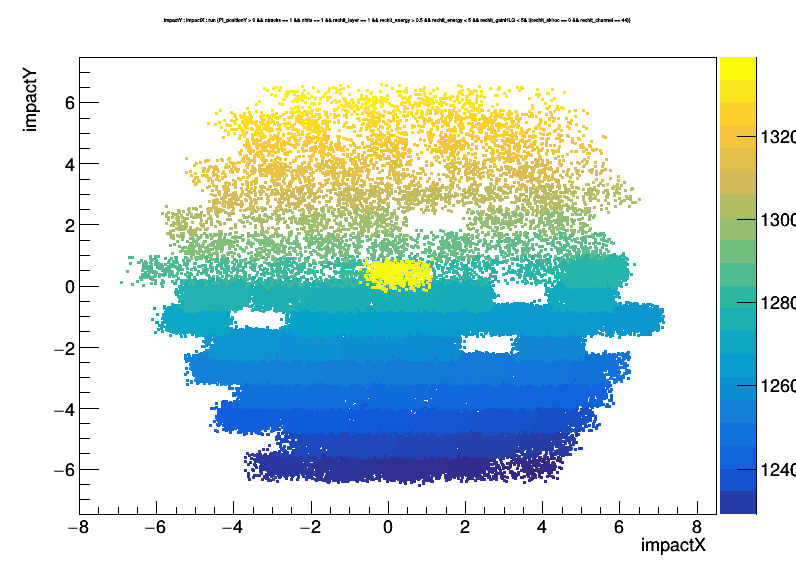

In [13]:
%%time
cuts = basecuts
canv.cd()
tree.Draw("impactY : impactX : run",cuts,"pcolz");
canv.Draw()

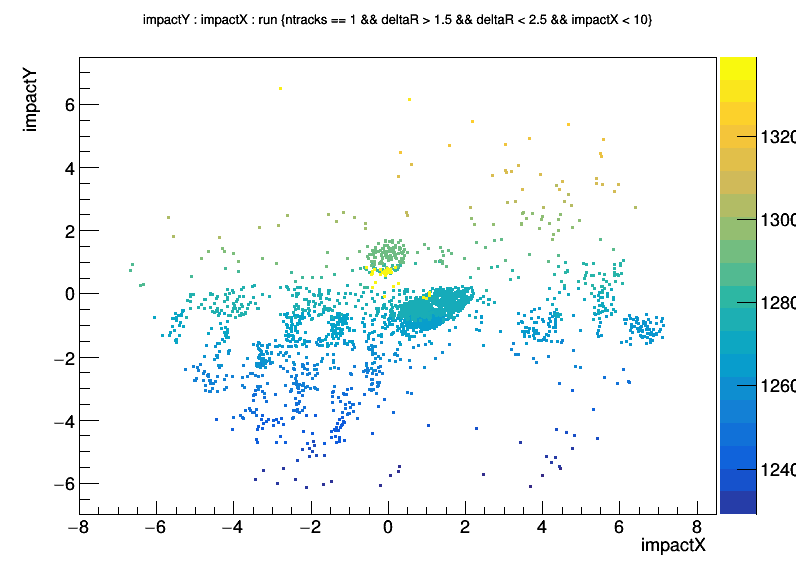

In [14]:
canv.cd()
tree.Draw("impactY : impactX : run","ntracks == 1 && deltaR > 1.5 && deltaR < 2.5 && impactX < 10","pcolz");
canv.Draw()

#### Plot rechit positions

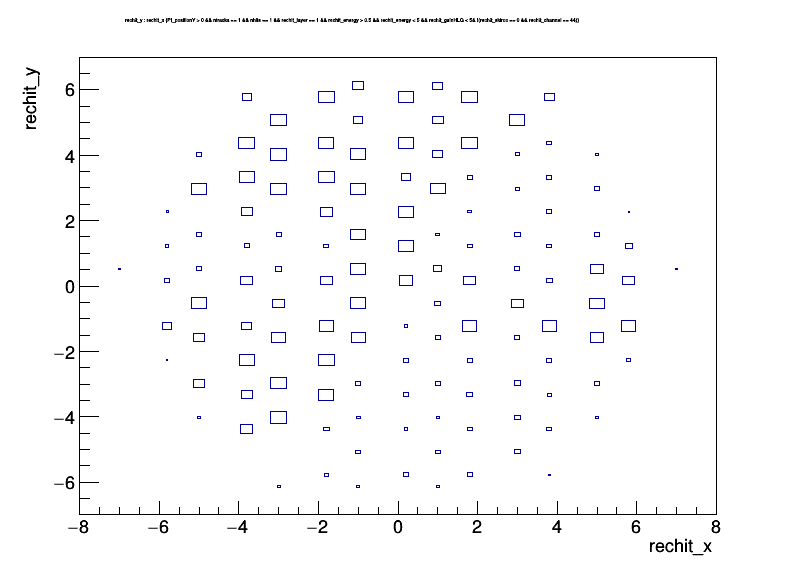

In [15]:
tree.Draw("rechit_y : rechit_x",cuts,"box");
canv.Draw()

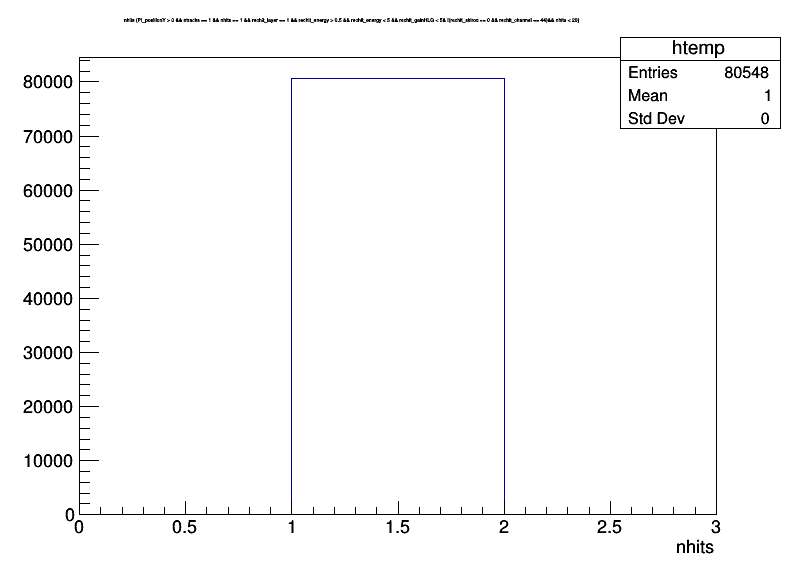

In [16]:
canv.cd()
cuts = basecuts + "&& nhits < 20"
tree.Draw("nhits",cuts,"");
canv.Draw()

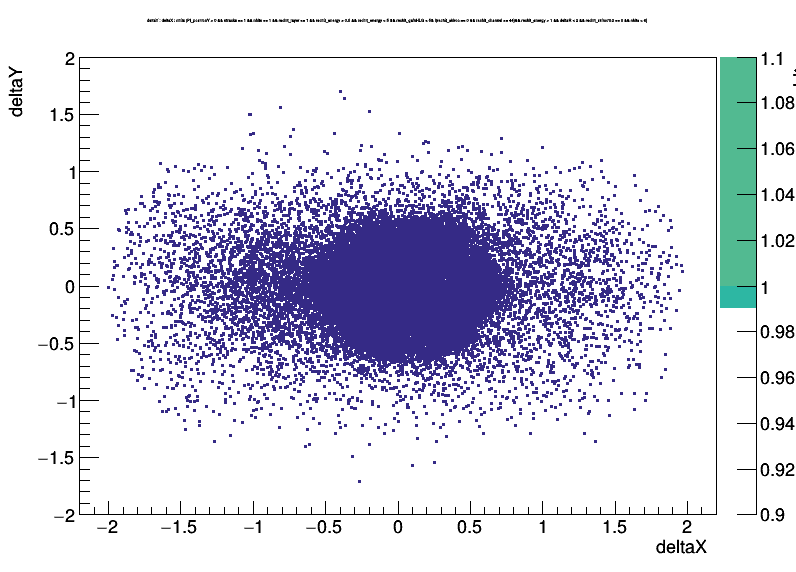

In [17]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
tree.Draw("deltaY : deltaX : nhits",cuts,"pcolz");
canv.Draw()

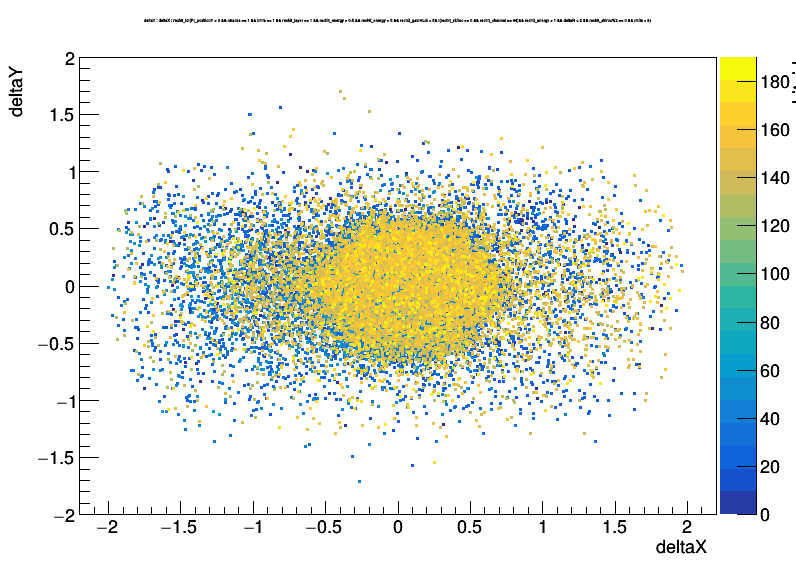

In [35]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
tree.Draw("deltaY : deltaX : rechit_id",cuts,"pcolz");
canv.Draw()

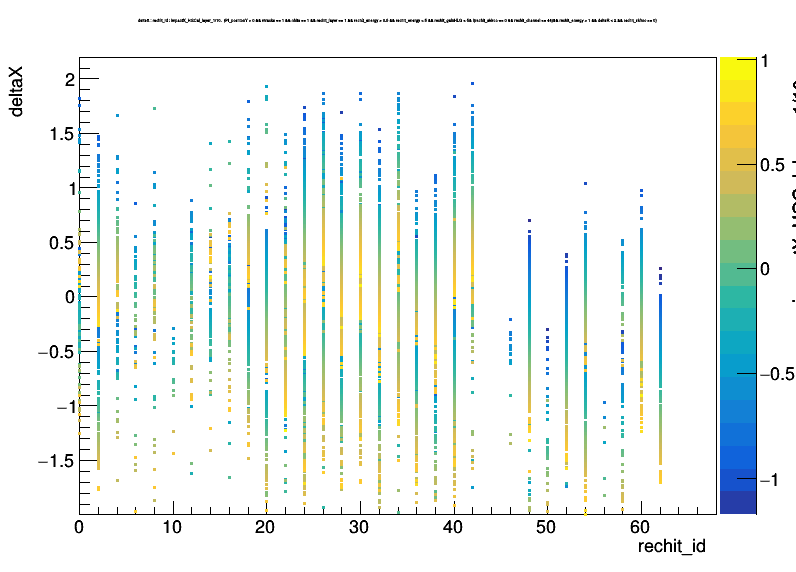

In [38]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc == 0"
tree.Draw("deltaX : rechit_id : impactX_HGCal_layer_1/10. ",cuts,"pcolz");
canv.Draw()

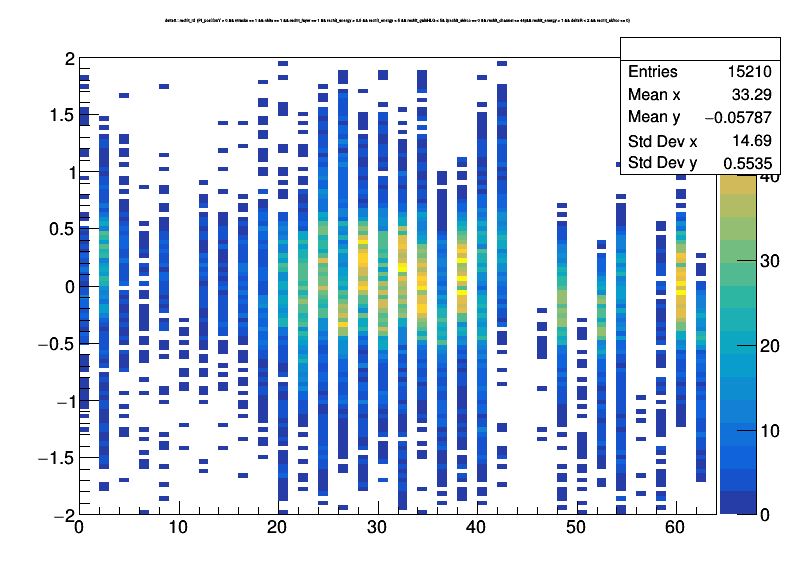

In [39]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc == 0"
tree.Draw("deltaX : rechit_id >> (64, 0, 64, 100, -2,2) ",cuts,"colz");
canv.Draw()

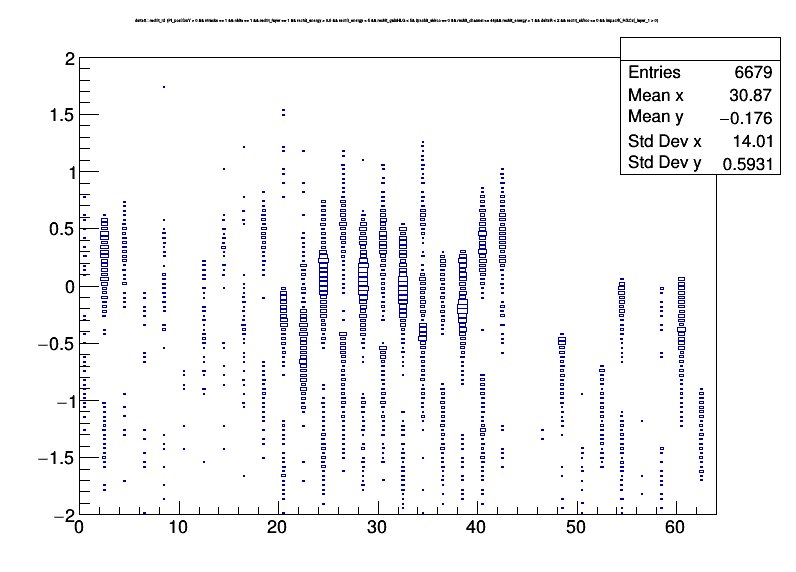

In [43]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc == 0 && impactX_HGCal_layer_1 > 0"
tree.Draw("deltaX : rechit_id >> (64, 0, 64, 100, -2,2) ",cuts,"box");
canv.Draw()

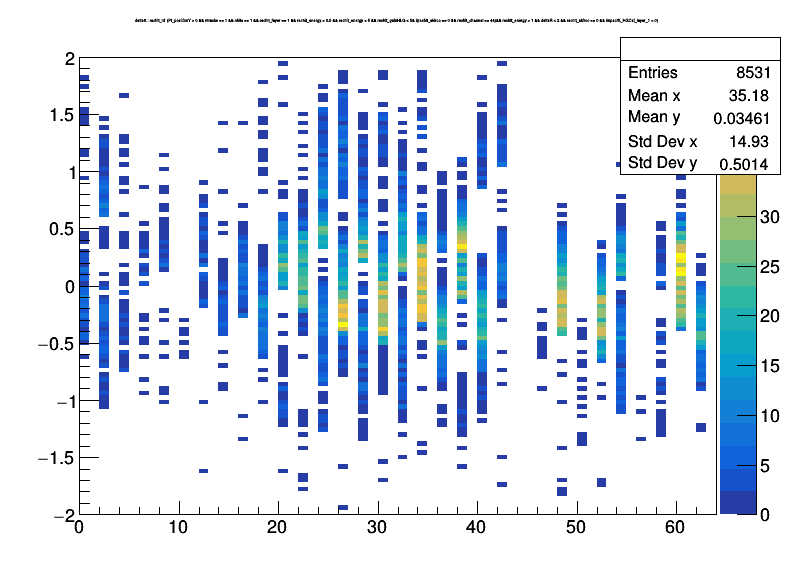

In [42]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc == 0 && impactX_HGCal_layer_1 < 0"
tree.Draw("deltaX : rechit_id >> (64, 0, 64, 100, -2,2) ",cuts,"colz");
canv.Draw()

In [30]:
%jsroot off

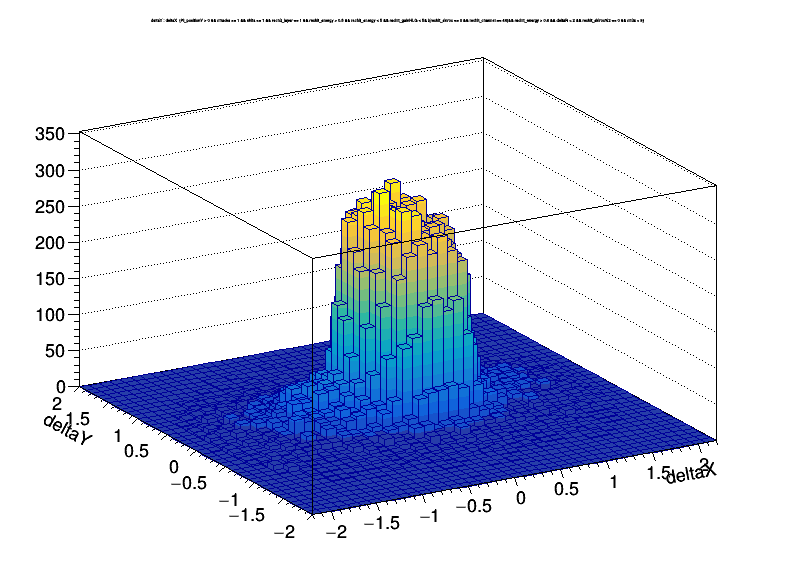

In [26]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 0.6 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
tree.Draw("deltaY : deltaX ",cuts,"lego2");
canv.Draw()

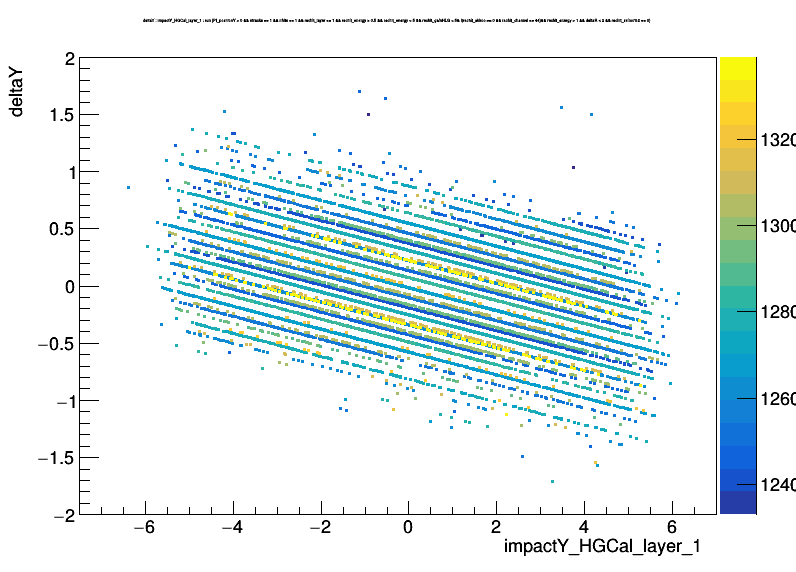

In [32]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0"
tree.Draw("deltaY : impactY_HGCal_layer_1 : run",cuts,"pcolz");
canv.Draw()

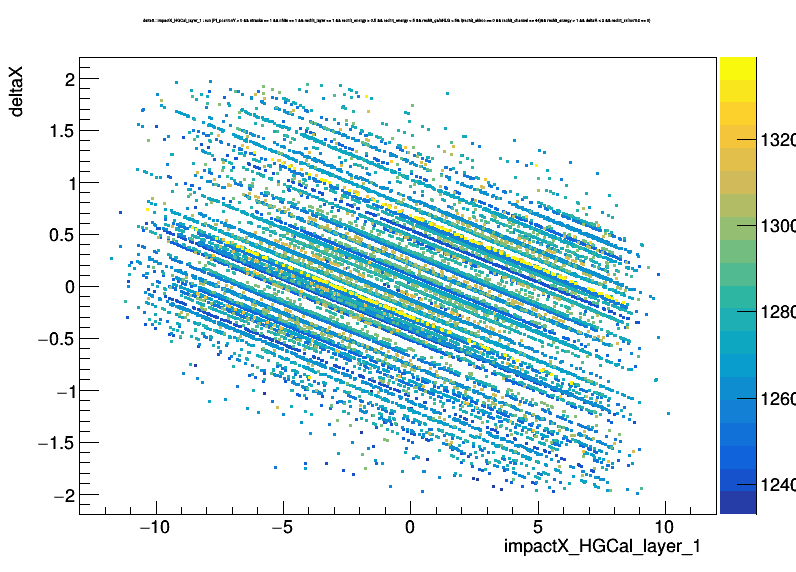

In [31]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0"
tree.Draw("deltaX : impactX_HGCal_layer_1 : run",cuts,"pcolz");
canv.Draw()

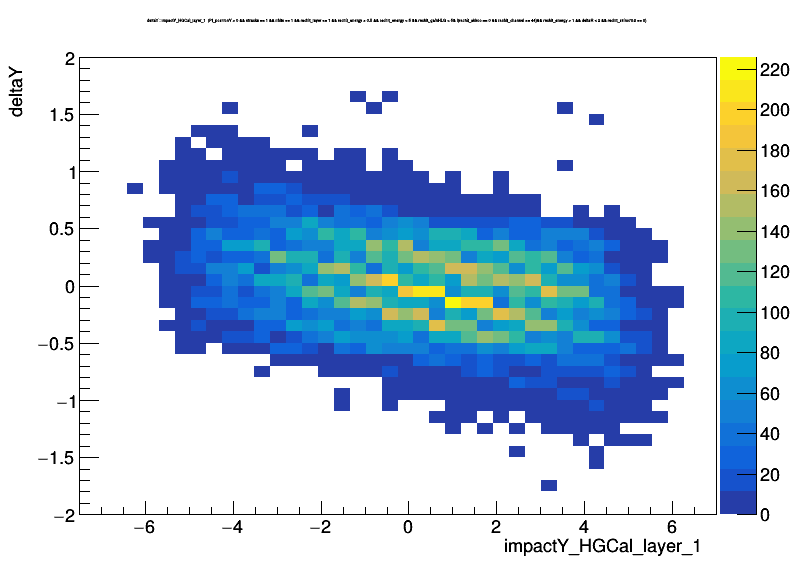

In [34]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0"
tree.Draw("deltaY : impactY_HGCal_layer_1 ",cuts,"colz");
canv.Draw()

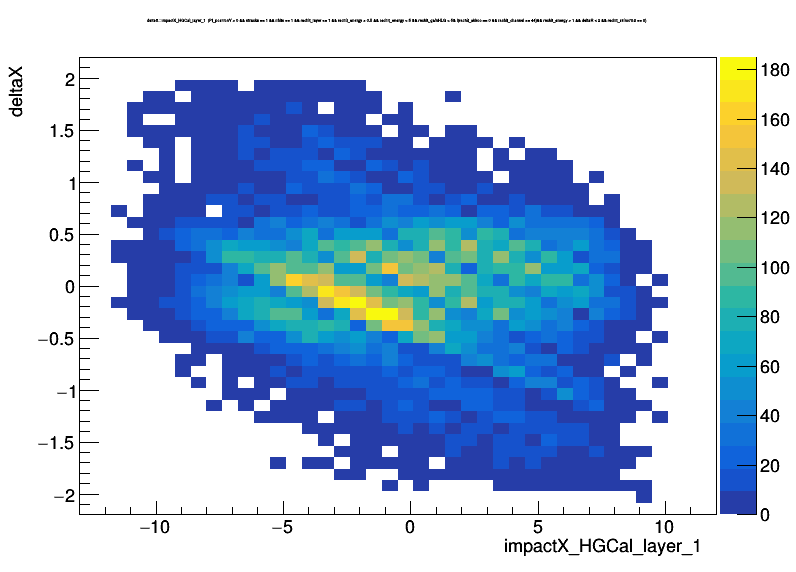

In [33]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0"
tree.Draw("deltaX : impactX_HGCal_layer_1 ",cuts,"colz");
canv.Draw()

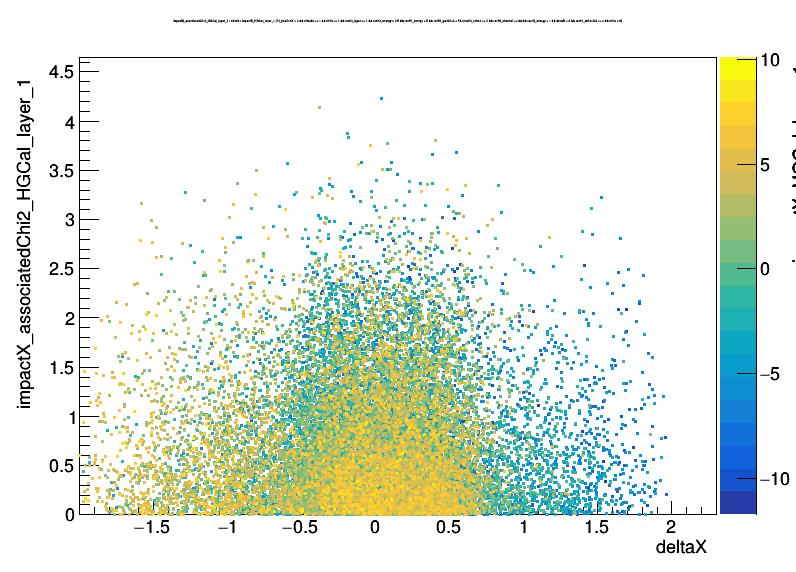

In [44]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
tree.Draw("impactX_associatedChi2_HGCal_layer_1 : deltaX : impactX_HGCal_layer_1",cuts,"pcolz");
canv.Draw()

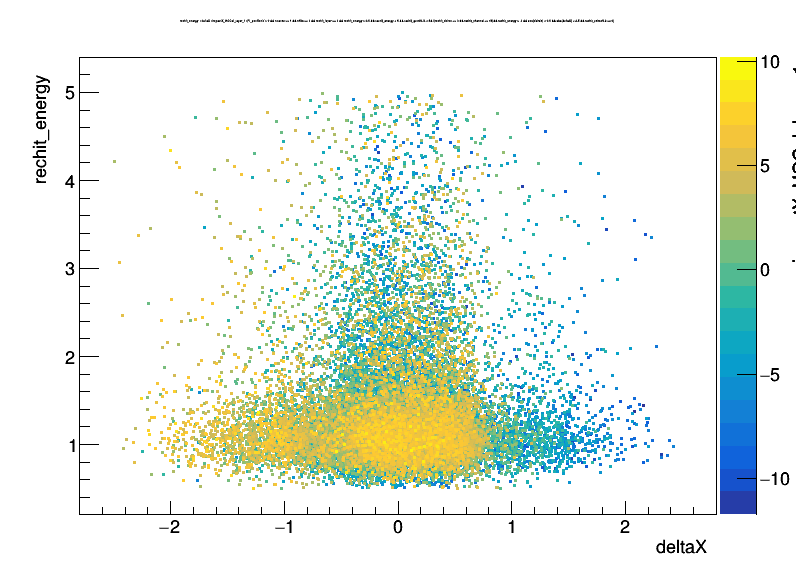

In [19]:
canv.cd()
cuts = basecuts + "&& rechit_energy > .1 && abs(deltaY) < 0.5 && abs(deltaX) < 2.5 && rechit_skiroc%2 == 0"
tree.Draw("rechit_energy  : deltaX : impactX_HGCal_layer_1",cuts,"pcolz");
canv.Draw()

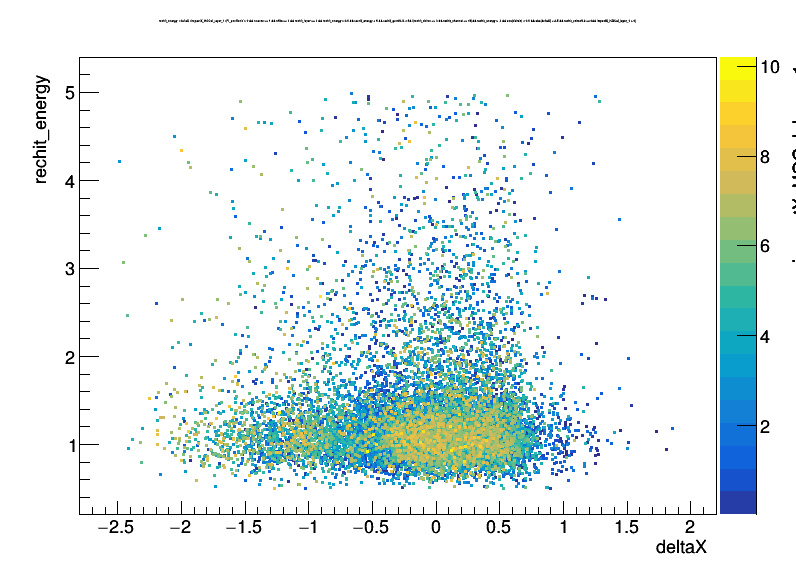

In [20]:
canv.cd()
cuts = basecuts + "&& rechit_energy > .1 && abs(deltaY) < 0.5 && abs(deltaX) < 2.5 && rechit_skiroc%2 == 0"
cuts += "&& impactX_HGCal_layer_1 > 0"
tree.Draw("rechit_energy  : deltaX : impactX_HGCal_layer_1",cuts,"pcolz");
canv.Draw()

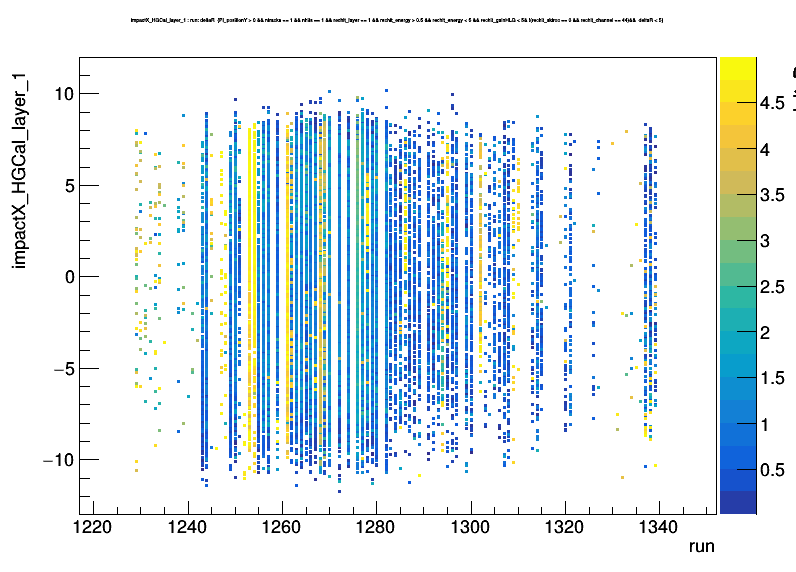

In [21]:
canv.cd()
cuts = basecuts + "&&  deltaR < 5"
tree.Draw("impactX_HGCal_layer_1 : run: deltaR ",cuts,"pcolz");
canv.Draw()

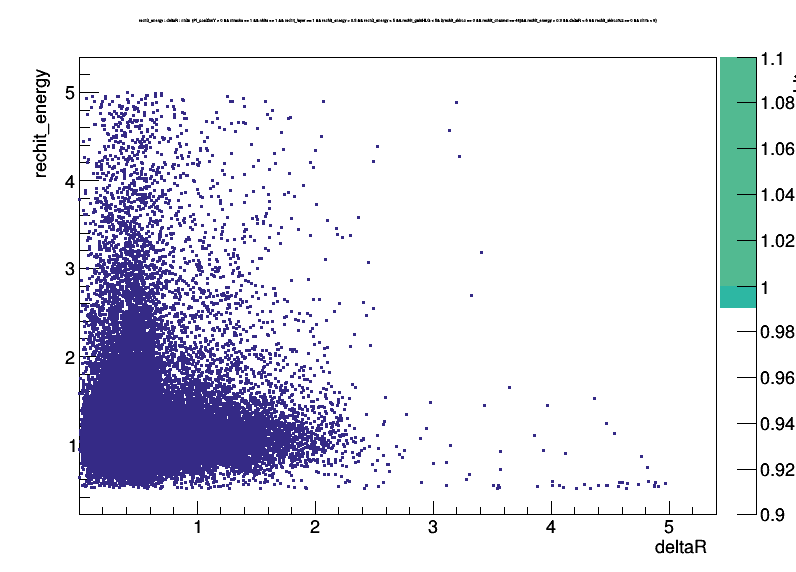

In [22]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 0.3 && deltaR < 5 && rechit_skiroc%2 == 0 && nhits < 8"
tree.Draw("rechit_energy : deltaR : nhits ",cuts,"pcolz");
canv.Draw()

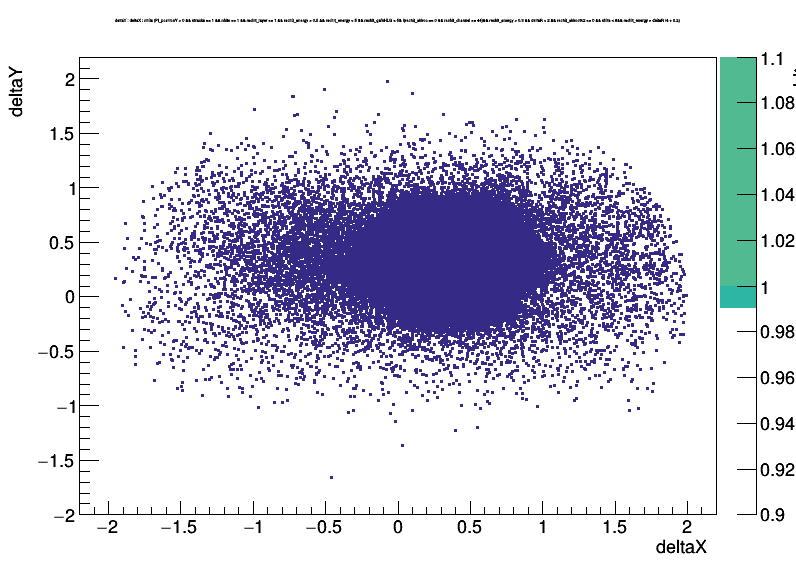

In [23]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 0.3 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
cuts += "&& rechit_energy > deltaR /4 + 0.2"
tree.Draw("deltaY : deltaX : nhits",cuts,"pcolz");
canv.Draw()

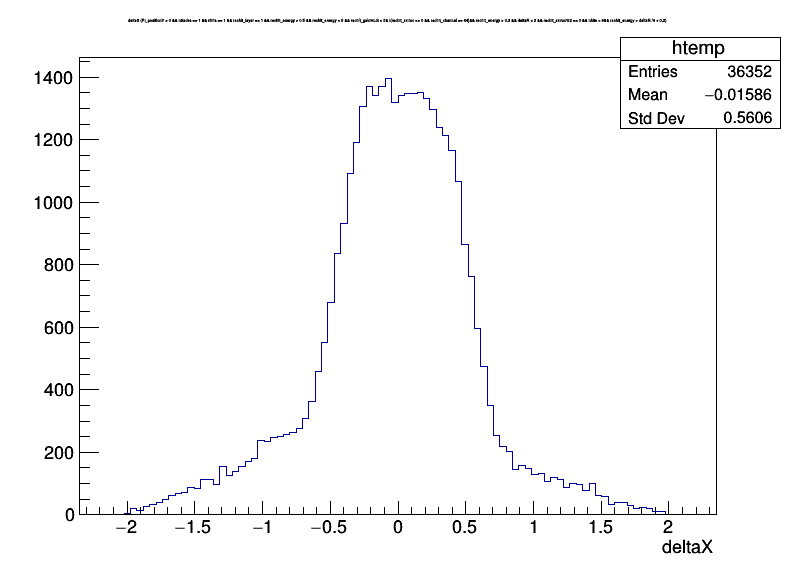

In [23]:
canv.cd()
cuts = basecuts + "&& rechit_energy > 0.3 && deltaR < 2 && rechit_skiroc%2 == 0 && nhits < 8"
cuts += "&& rechit_energy > deltaR /4 + 0.2"
tree.Draw("deltaX",cuts,"");
canv.Draw()

### Look at deltaX / deltaY and obtain mean offset (and fit gaussian)

 FCN=1100.1 FROM MIGRAD    STATUS=CONVERGED      79 CALLS          80 TOTAL
                     EDM=2.50325e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.46905e+02   7.52900e+00   9.75973e-02  -1.16311e-07
   2  Mean         3.34267e-01   2.31848e-03   3.75652e-05   9.52947e-03
   3  Sigma        3.64407e-01   1.73833e-03   1.89513e-05  -2.78319e-03


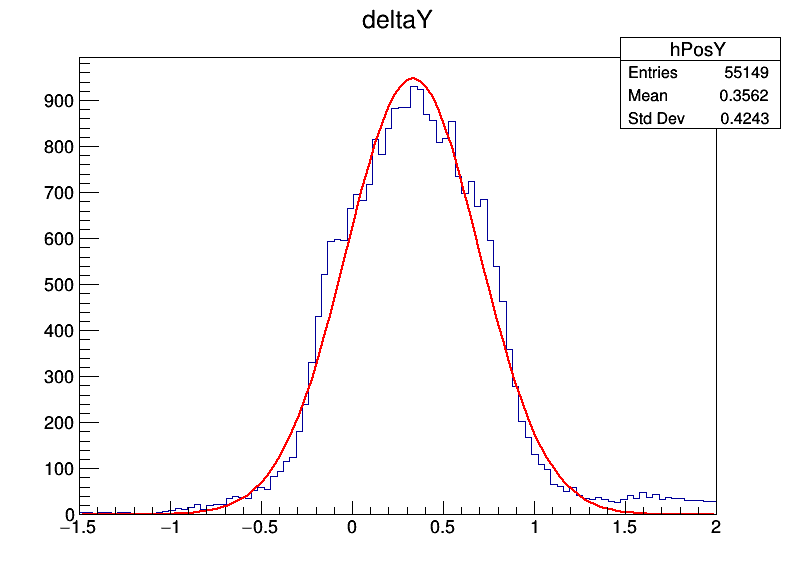

In [25]:
# require > 1 MIP to clean signal
cuts = basecuts + "&& rechit_energy > 1"

hPosY = rt.TH1F("hPosY","deltaY", 100,-1.5,2);
tree.Draw("deltaY >> hPosY ",cuts,"");
hPosY.Fit("gaus");

canv.Draw()

The deltaY distribution looks nice but is shifted by 0.37 / 0.33 cm (mean/fit)
- redefine impactY with the shift

In [26]:
tree.SetAlias("impactY","-(PI_positionY-140 - impactY_HGCal_layer_1)/10. + 0.34");

 FCN=2859.32 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=1.7945e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.98605e+02   5.77343e+00   9.17742e-02  -5.86405e-05
   2  Mean         2.54337e-01   4.34293e-03   1.09213e-04  -1.29787e-01
   3  Sigma        6.84002e-01   5.67561e-03   4.25821e-05  -2.08968e-01


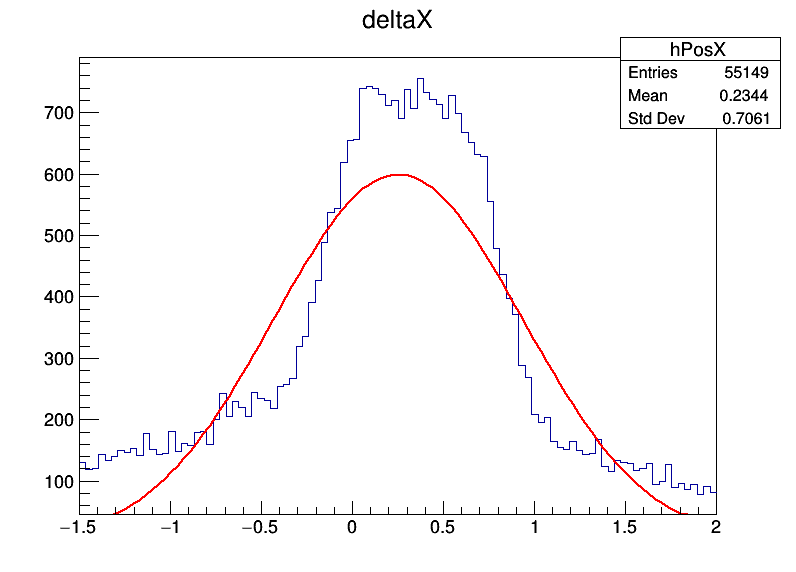

In [27]:
# require > 1 MIP to clean signal
cuts = basecuts + "&& rechit_energy > 1"

hPosX = rt.TH1F("hPosX","deltaX", 100,-1.5,2);
tree.Draw("deltaX >> hPosX ",cuts,"");
hPosX.Fit("gaus");

canv.Draw()

The deltaX distribution looks less nice / asymmetric and is also shifted by 0.2 / 0.21 cm (mean/fit)
- redefine impactY with the shift (guess of peak is ~0.3)

In [28]:
tree.SetAlias("impactX","-(PI_positionX-85  - impactX_HGCal_layer_1)/10. + 0.3");

### Control plots for alignment

In [29]:
## create canvas with 2 pads
canv_split = rt.TCanvas("canv_split","Split",1200,600);
canv_split.Divide(2);

#### DeltaX/deltaY vs the global channel id

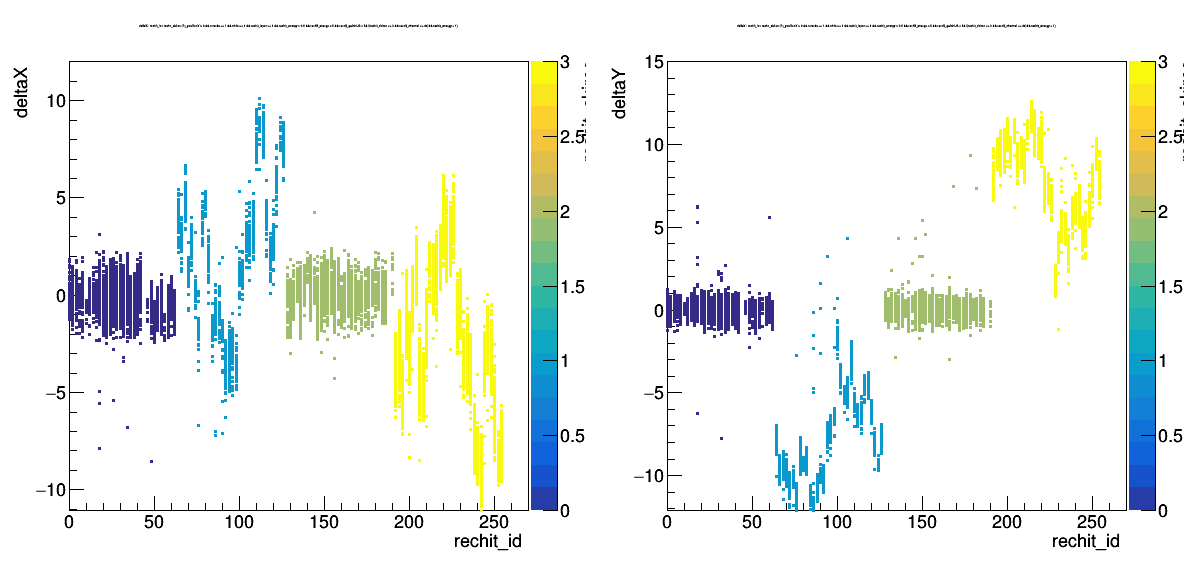

In [30]:
# require > 1 MIP to clean signal
cuts = basecuts + "&& rechit_energy > 1"

canv_split.cd(1)
tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv_split.cd(2)
tree.Draw("deltaY : rechit_id : rechit_skiroc",cuts,"pcolz");

canv_split.Draw()

Chips 0 and 2 are flat, while chips 1 and 3 show symmetric misalignment patterns

#### Deltas vs run = scan position

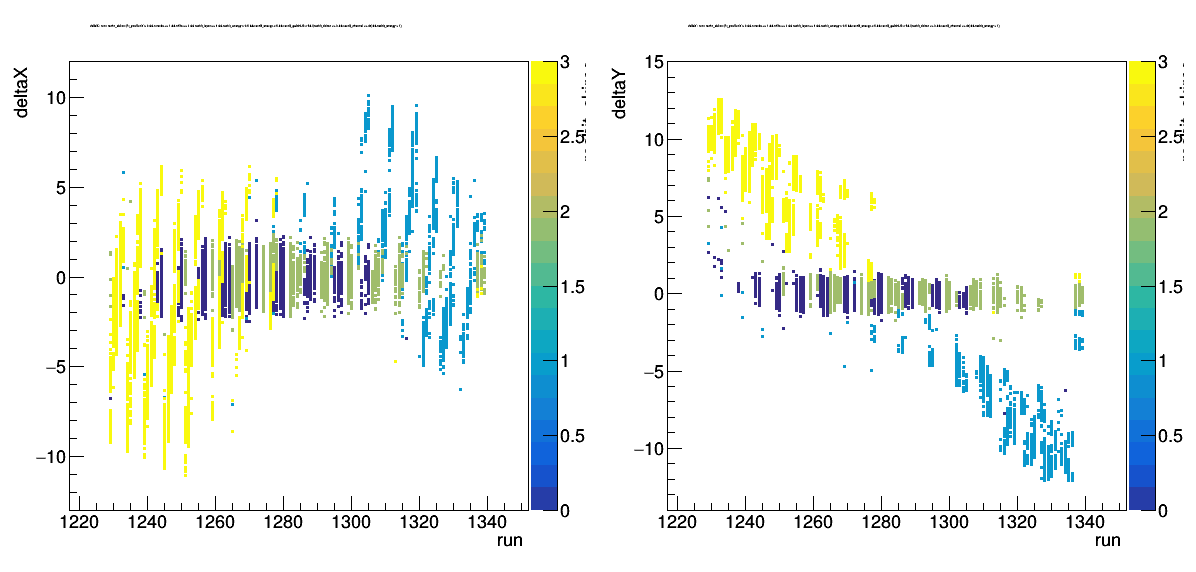

In [31]:
canv_split.cd(1)
tree.Draw("deltaX : run : rechit_skiroc",cuts,"pcolz");
canv_split.cd(2)
tree.Draw("deltaY : run : rechit_skiroc",cuts,"pcolz");

canv_split.Draw()

Deltas of chips 0 and 2 are stable wrt the run/stage position, while for chips 1 and 3 there is a trend pointing to misalignment of the rechit positions.

#### DeltaR vs channel ID and run number

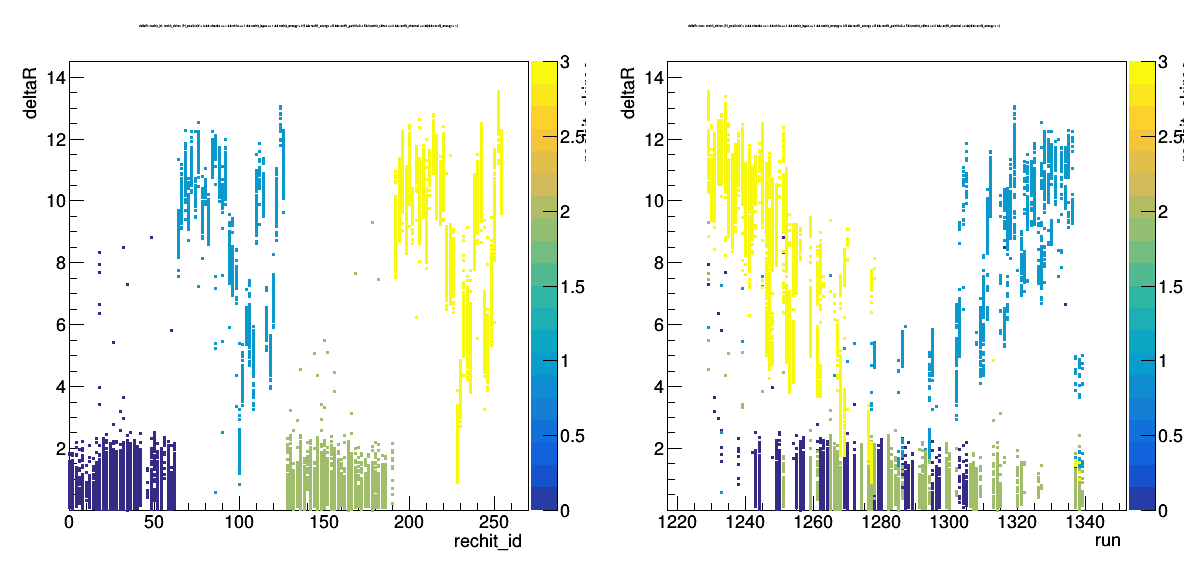

In [32]:
canv_split.cd(1); tree.Draw("deltaR : rechit_id : rechit_skiroc",cuts,"pcolz");
canv_split.cd(2); tree.Draw("deltaR : run : rechit_skiroc",cuts,"pcolz");
canv_split.Draw()

Again, for chips 0 and 2 the deltaR is low and flat, whereas for chips 1 and 3 there are symmetric offests

### Trying to fix chips 1&3 positions

Given the observed symmetric misalignment of chips 1 and 3, let's try to invert their positions:
`rechit_x/y = -rechit_x/y`

In [33]:
## Invert rechit positions for Chips 1 and 3 (use for bad mapping)
tree.SetAlias("rechit_corry","rechit_y * (-1+2*(rechit_skiroc%2 == 0))");
tree.SetAlias("rechit_corrx","rechit_x * (-1+2*(rechit_skiroc%2 == 0))");
## Update deltaX/Y definitions
tree.SetAlias("deltaX","rechit_corrx - impactX");
tree.SetAlias("deltaY","rechit_corry - impactY");

Repeat deltaX/Y vs channel id plots after position inversion for chips 1 and 3

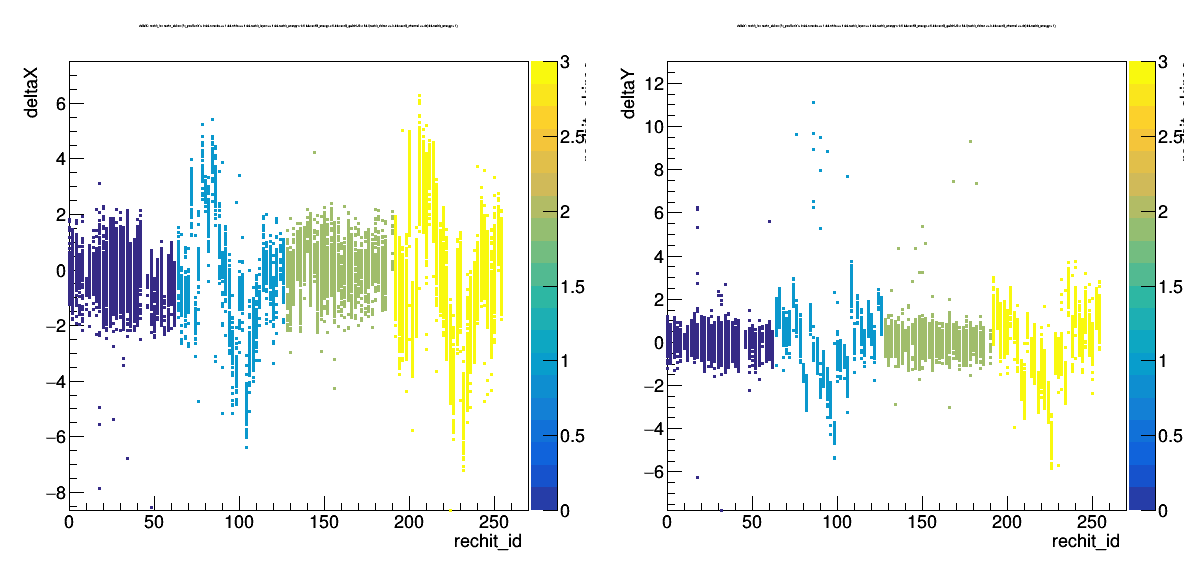

In [34]:
canv_split.cd(1); tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv_split.cd(2); tree.Draw("deltaY : rechit_id : rechit_skiroc",cuts,"pcolz");
canv_split.Draw()

The large offset in the deltaX/Y is removed, with the symmetric offset shape still remaining

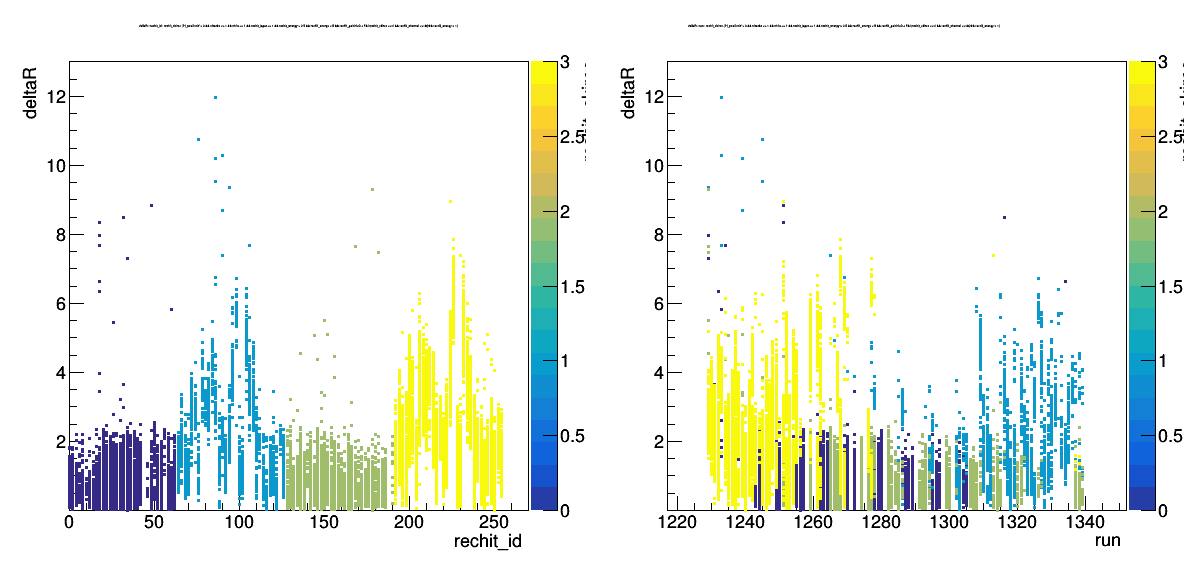

In [35]:
canv_split.cd(1); tree.Draw("deltaR : rechit_id : rechit_skiroc",cuts,"pcolz");
canv_split.cd(2); tree.Draw("deltaR : run : rechit_skiroc",cuts,"pcolz");
canv_split.Draw()

=> Residuals reduced, while still remaining for chips 1 and 3

### Check X and Y impact alignment

Use only the "good" even channels to do the alignment

 FCN=1386.28 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=6.21161e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.04325e+02   5.65765e+00   7.23525e-02  -1.16450e-04
   2  Mean         2.69361e-03   3.09419e-03   5.51119e-05   1.31654e-01
   3  Sigma        4.57555e-01   3.08252e-03   2.67526e-05  -6.23510e-01
 FCN=533.322 FROM MIGRAD    STATUS=CONVERGED      50 CALLS          51 TOTAL
                     EDM=3.96639e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.20504e+02   6.35732e+00   5.90213e-02   6.32801e-05
   2  Mean        -8.09904e-03   2.29453e-03   2.58457e-05   6.26215e-02
   3  Sigma        3.59067e-01   

Warning in <TROOT::Append>: Replacing existing TH1: hPosX (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPosY (Potential memory leak).


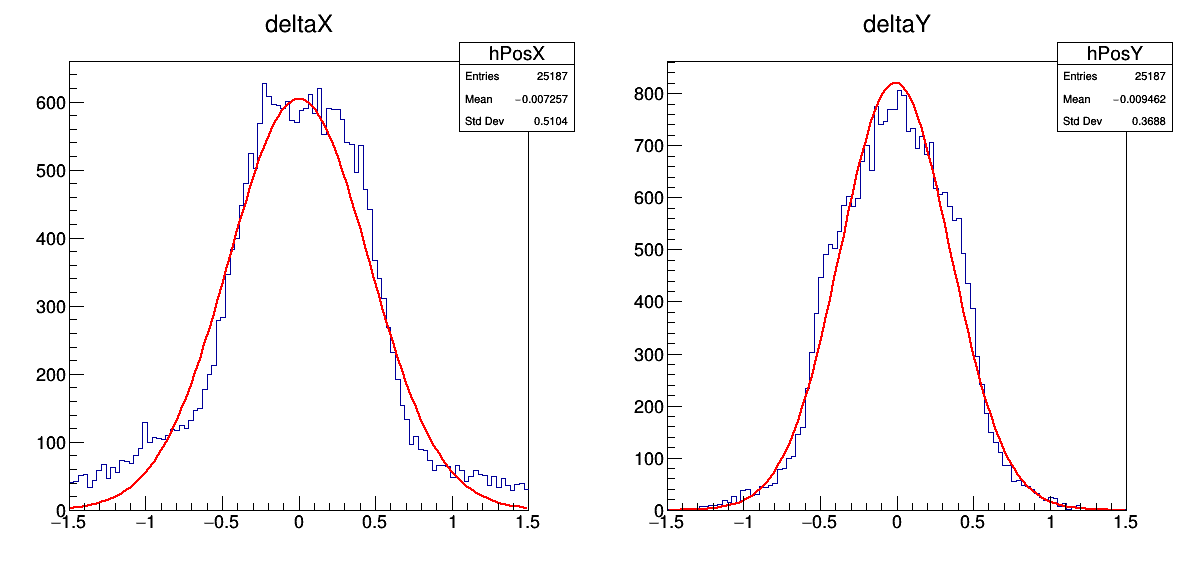

In [36]:
cuts = basecuts + "&& rechit_energy > 1 && rechit_skiroc%2 == 0"

## deltaX
canv_split.cd(1); 
hPosX = rt.TH1F("hPosX","deltaX", 100,-1.5,1.5); tree.Draw("deltaX >> hPosX ",cuts,"");
hPosX.Fit("gaus");

## deltaY
canv_split.cd(2); 
hPosY = rt.TH1F("hPosY","deltaY", 100,-1.5,1.5); tree.Draw("deltaY >> hPosY ",cuts,"");
hPosY.Fit("gaus");

canv_split.Draw()

Alignment looks good, so check the odd chip channels

Warning in <TROOT::Append>: Replacing existing TH1: hPosX (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPosY (Potential memory leak).


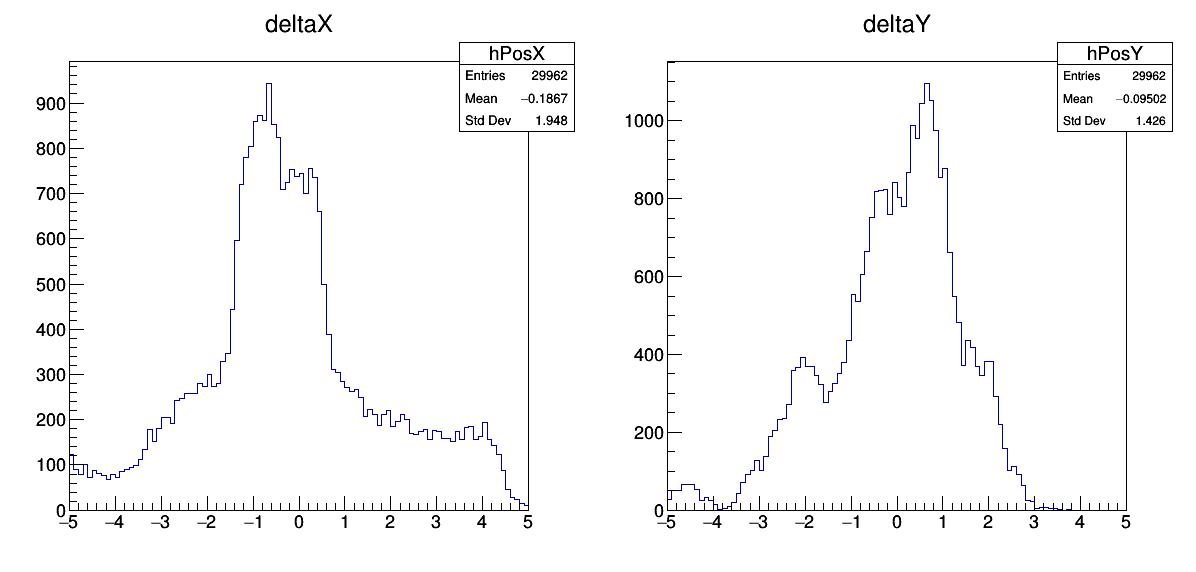

In [37]:
cuts = basecuts + "&& rechit_energy > 1 && rechit_skiroc%2 == 1"

## deltaX
canv_split.cd(1); 
hPosX = rt.TH1F("hPosX","deltaX", 100,-5,5); tree.Draw("deltaX >> hPosX ",cuts,"");
#hPosX.Fit("gaus");

## deltaY
canv_split.cd(2); 
hPosY = rt.TH1F("hPosY","deltaY", 100,-5,5); tree.Draw("deltaY >> hPosY ",cuts,"");
#hPosY.Fit("gaus");

canv_split.Draw()

`deltaX` is slightly negatively biased, and `deltaY` positively

#### Check deltaR

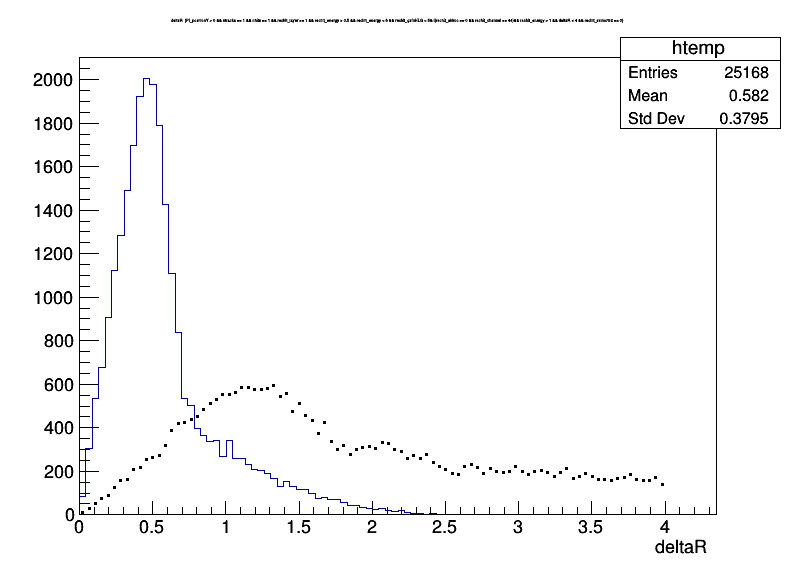

In [38]:
canv.cd() # return to single pad canvas
# plot only for "good" even chips
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 4 && rechit_skiroc%2 == 0"; tree.Draw("deltaR ",cuts,"");
# overlay plot for even chips
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 4 && rechit_skiroc%2 == 1"; tree.Draw("deltaR ",cuts,"p same");
canv.Draw()

`deltaR` still not centred at 0

#### Overall plot of deltaX/Y

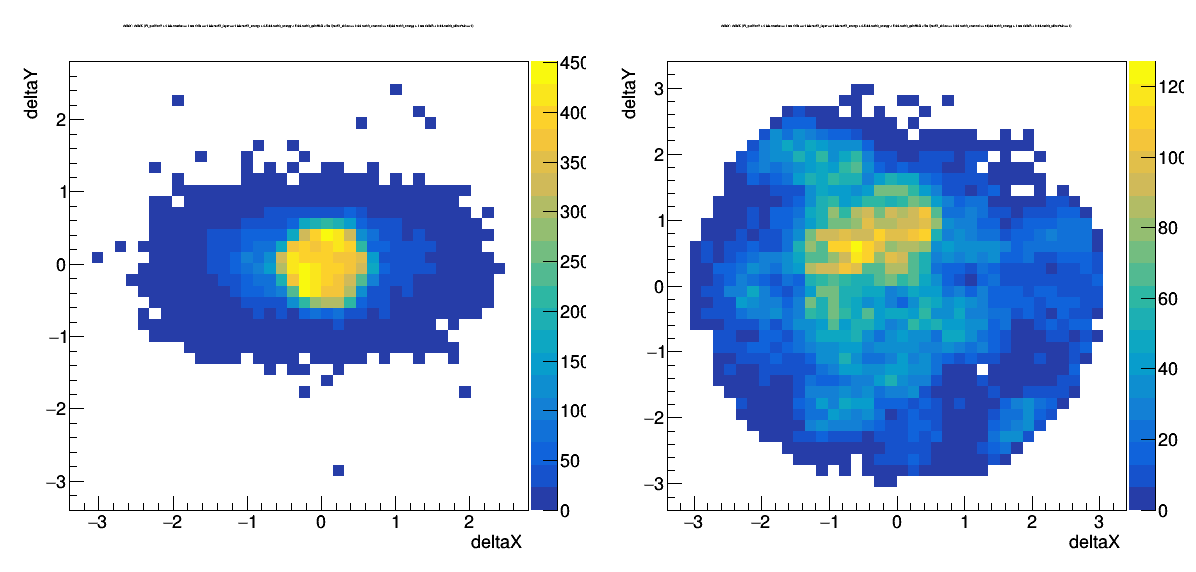

In [39]:
# plot only for "good" even chips
canv_split.cd(1); 
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 3 && rechit_skiroc%2 == 0"
tree.Draw("deltaY : deltaX ",cuts,"colz");

# plot only for "bad" odd chips
canv_split.cd(2); 
cuts = basecuts + "&& rechit_energy > 1 && deltaR < 3 && rechit_skiroc%2 == 1"
tree.Draw("deltaY : deltaX ",cuts,"colz");

canv_split.Draw()

## Plots of energy

In [40]:
# return to basic cuts
cuts = basecuts

#### Plot rechit energy vs deltaR for each chip individually

In [41]:
# Divide new canvas into four pads and increase size
canv_split4 = rt.TCanvas("canv_split4","Split",2000,1200);
canv_split4.Divide(2,2);

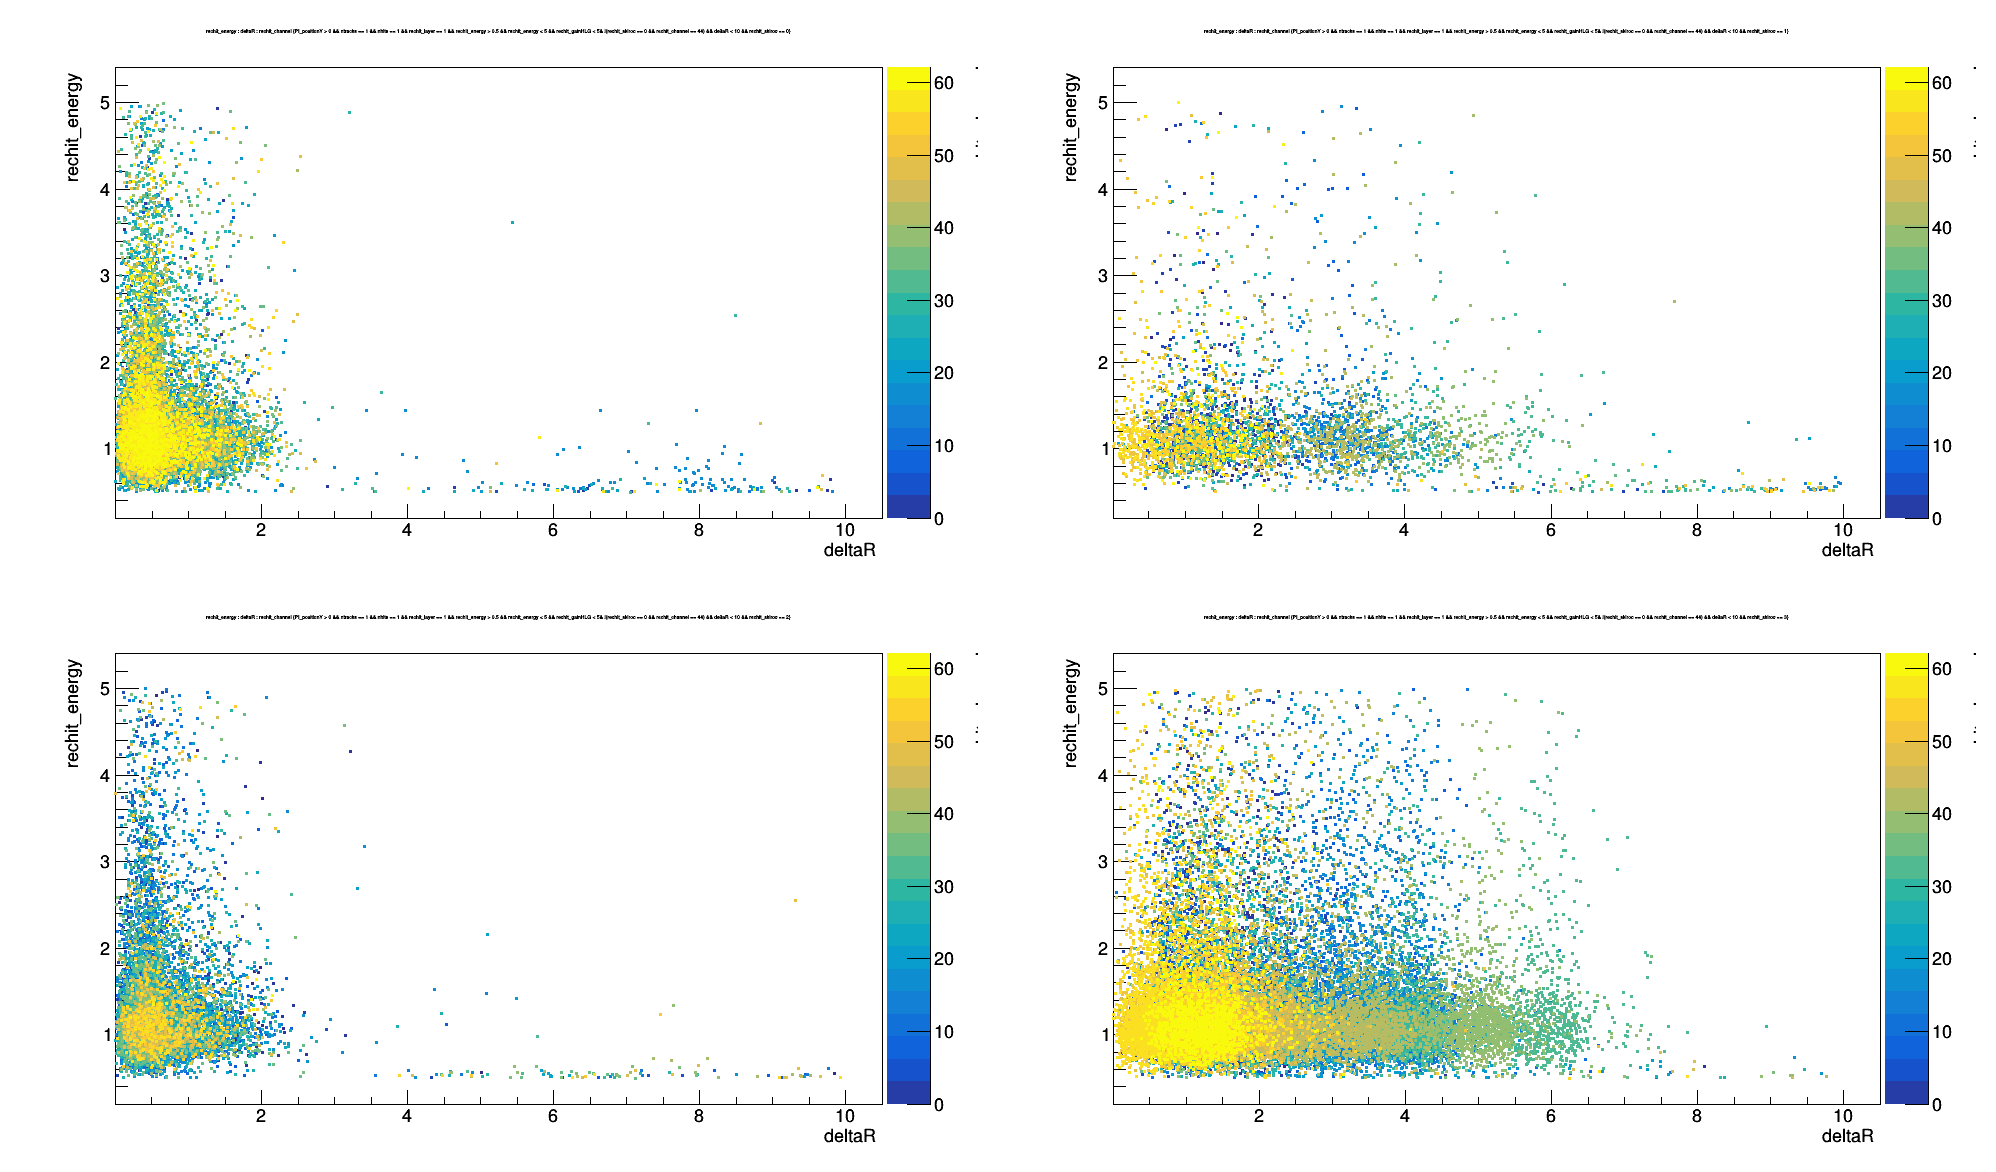

In [42]:
for chip in range(4):
    canv_split4.cd(chip+1);
 
    cuts = basecuts + " && deltaR < 10 && rechit_skiroc == %i" %chip;
    tree.Draw("rechit_energy : deltaR : rechit_channel",cuts,"pcolz");
    
canv_split4.Draw()

#### Plot rechit energy (HG) for different deltaR cuts

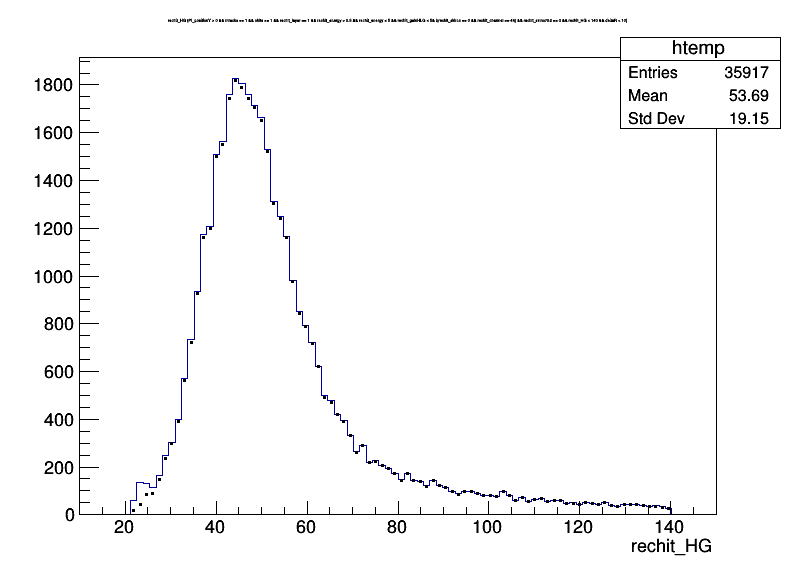

In [43]:
canv.cd()
cuts = basecuts + " && rechit_skiroc%2 == 0 && rechit_HG < 140 && deltaR < 10";
tree.Draw("rechit_HG",cuts,"");

cuts += " && deltaR < 2";
tree.Draw("rechit_HG",cuts,"p same");

canv.Draw()

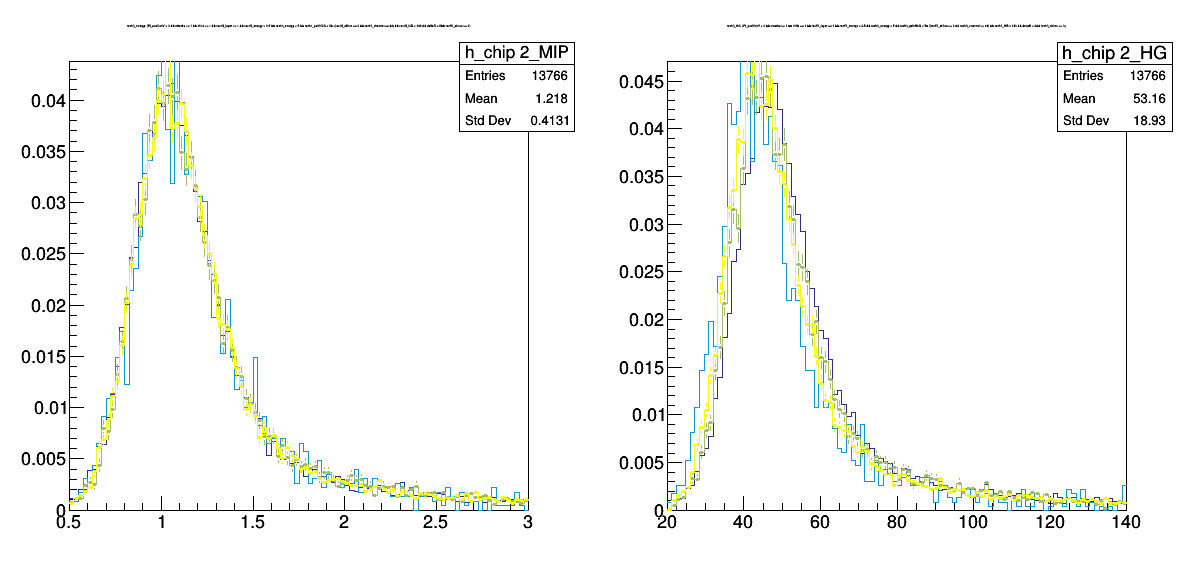

In [44]:
popt = "hist PLC PMC"
#canv.cd()
for chip in range(0,4,1):
    cuts = basecuts + " && rechit_HG < 140 && deltaR < 2";
    cuts += "&& rechit_skiroc == %i" %chip
    
    hname = "h_chip %i" % chip
    tree.Draw("rechit_energy >> " + hname +"_MIP(100,0.5,3)", cuts, "goff");
    
    hist = rt.gDirectory.Get(hname+"_MIP")
    canv_split.cd(1)
    hist.DrawNormalized(popt)
    
    tree.Draw("rechit_HG >> "     + hname +"_HG(100,20,140)", cuts, "goff");
    
    hist = rt.gDirectory.Get(hname+"_HG")
    canv_split.cd(2)
    hist.DrawNormalized(popt)
    
    popt += "same"
canv_split.Draw()

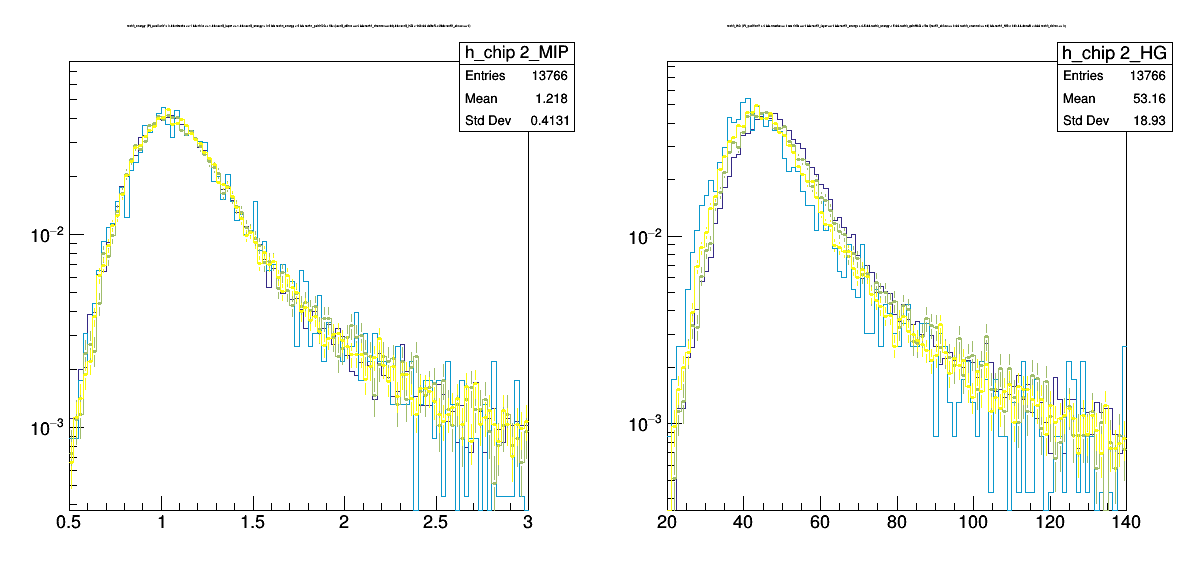

In [45]:
canv_split.cd(1).SetLogy()
canv_split.cd(2).SetLogy()

canv_split.Draw()

In [46]:
canv_split.cd(1).SetLogy(0)
canv_split.cd(2).SetLogy(0)

## MIP / MPV

Plot rechit energy vs channel id

In [47]:
canv.cd()
cuts = basecuts + " && deltaR < 2";
tree.Draw("rechit_HG : rechit_id : deltaR", cuts,"pcolz");
canv.Draw()

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10649b6d0>> (for post_execute):


Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/usr/local/Cellar/python@2/2.7.15/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 801, in __bootstrap_inner
  File "<decorator-gen-24>", line 2, in run
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/lib/python2.7/site-packages/IPython/core/history.py", line 60, in needs_sqlite
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/lib/python2.7/site-packages/IPython/core/history.py", line 843, in run
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 376, in write
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 203, in schedule
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 101, in _event_pipe
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/zm

OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpP5qPMI.png'

In [48]:
cuts = basecuts + " && deltaR < 2 && rechit_skiroc == 0";
tree.Draw("rechit_energy : rechit_channel >> (64,0,63,100,0.5,2)", cuts,"colz");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10649b6d0>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmppRwwMd.png'